# Data project: Connection between education level and unemployment

**Imports:**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
import numpy as np
import statistics


# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# Read and clean data

In order to examine the link between education level and unemployment at the Danish labor market, we use data from Statistics Denmark.

Education data contains the number of people with the highest completed education in the year 2019 (source: https://www.statistikbanken.dk/hfaudd11).

The unemployment data consists of the number of full-time unemployed people in the entire work force in Denmark in 2019 (source: https://www.statistikbanken.dk/aul01).

Thus, both data sets are cross-sectional data.

## Education data

**We load the education data** in ``HFUDD11_ny.xlsx``. 

The data looks like the following to begin with:

**Code:**

In [2]:
# Loading data
udda = pd.read_excel('HFUDD11_ny.xlsx', skiprows=2)
udda

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,I alt,H10 Grundskole,H20 Gymnasiale uddannelser,H30 Erhvervsfaglige uddannelser,"H40 Korte videregående uddannelser, KVU","H50 Mellemlange videregående uddannelser, MVU","H60 Bacheloruddannelser, BACH","H70 Lange videregående uddannelser, LVU",H80 Ph.d. og forskeruddannelser,H90 Uoplyst mv.
0,I alt,I alt,Hele landet,2019.0,25-29 år,399766.0,61703.0,54755.0,89828.0,22173.0,72898.0,31450.0,63129.0,766.0,2566.0
1,NaN,NaN,NaN,NaN,30-34 år,356645.0,53678.0,22719.0,93256.0,20089.0,72195.0,9817.0,75281.0,5407.0,3793.0
2,NaN,NaN,NaN,NaN,35-39 år,329704.0,49383.0,17300.0,98698.0,20382.0,64166.0,7071.0,60821.0,7683.0,3884.0
3,NaN,NaN,NaN,NaN,40-44 år,366721.0,53517.0,19203.0,123882.0,25426.0,69800.0,7708.0,55223.0,6926.0,4751.0
4,NaN,NaN,NaN,NaN,45-49 år,391815.0,63914.0,21847.0,142036.0,27727.0,70978.0,6667.0,47428.0,5841.0,5059.0
5,NaN,NaN,NaN,NaN,50-54 år,414671.0,73870.0,23867.0,168381.0,25352.0,69322.0,4791.0,38431.0,4445.0,5885.0
6,NaN,NaN,NaN,NaN,55-59 år,385674.0,80215.0,20407.0,157021.0,20778.0,63464.0,3555.0,28887.0,3371.0,7660.0
7,NaN,NaN,NaN,NaN,60-64 år,343995.0,86428.0,14216.0,128748.0,16695.0,59298.0,2265.0,24608.0,2108.0,9306.0
8,NaN,NaN,NaN,NaN,65-69 år,319431.0,80468.0,10268.0,129916.0,12581.0,58256.0,1881.0,21707.0,1193.0,2805.0
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We clean the data by removing and renaming columns and deleting empty cells. Furthermore, we generate shares of each education level and insert these in the table while deleting the absolute values.

**Code:**

In [3]:
# Dropping unnamed columns
udda.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3','I alt'], axis = 1, inplace = True)

# Renaming columns
udda.rename(columns = {'Unnamed: 4':'Age', 'H10 Grundskole':'Primary_school', 'H20 Gymnasiale uddannelser':'High_school', 'H30 Erhvervsfaglige uddannelser':'Vocational_education','H40 Korte videregående uddannelser, KVU':'Short_higher_education', 'H50 Mellemlange videregående uddannelser, MVU':'Medium_higher_education', 'H60 Bacheloruddannelser, BACH':'Bachelor_degree', 'H70 Lange videregående uddannelser, LVU':'Long_higher_education', 'H80 Ph.d. og forskeruddannelser':'Phd', 'H90 Uoplyst mv.':'Missing'}, inplace = True)

# Multiplying the two last rows to obtain categories corresponding to the unemployment data
new_row = udda.iloc[7] + udda.iloc[8]
educ1 = udda.append([new_row], ignore_index = True)

# Inserting new column and reindexing rows 
educ2 = educ1.iloc[[0,1,2,3,4,5,6,12]].reset_index(drop = True)

# Summing all the rows
all_rows = educ2.iloc[0] + educ2.iloc[1] + educ2.iloc[2] + educ2.iloc[3] + educ2.iloc[4] + educ2.iloc[5] + educ2.iloc[6] + educ2.iloc[7]
educ = educ2.append([all_rows], ignore_index = True)
educ.drop('Age', axis = 'columns', inplace = True)
educ.insert(0, "Age", ['25-29 years', '30-34 years', '35-39 years', '40-44 years', '45-49 years', '50-54 years', '55-59 years', 'Above 60 years', 'Total'])

# Generating shares for each colum
col_1 = []
for row in range(9):
    h = educ.iloc[row,1] / educ.iloc[8,1]
    col_1.append(h)

col_2 = []
for row in range(9):
    h = educ.iloc[row,2] / educ.iloc[8,2]
    col_2.append(h)
    
col_3 = []
for row in range(9):
    h = educ.iloc[row,3] / educ.iloc[8,3]
    col_3.append(h)

col_4 = []
for row in range(9):
    h = educ.iloc[row,4] / educ.iloc[8,4]
    col_4.append(h)
    
col_5 = []
for row in range(9):
    h = educ.iloc[row,5] / educ.iloc[8,5]
    col_5.append(h)

col_6 = []
for row in range(9):
    h = educ.iloc[row,6] / educ.iloc[8,6]
    col_6.append(h)
    
col_7 = []
for row in range(9):
    h = educ.iloc[row,7] / educ.iloc[8,7]
    col_7.append(h)
    
col_8 = []
for row in range(9):
    h = educ.iloc[row,8] / educ.iloc[8,8]
    col_8.append(h)
    
col_9 = []
for row in range(9):
    h = educ.iloc[row,9] / educ.iloc[8,9]
    col_9.append(h)

# Inserting the new data to the existing table
educ.insert(1, "Share_ primary_school", col_1)
educ.insert(2, "Share_high_school", col_2)
educ.insert(3, "Share_vocational_education", col_3)
educ.insert(4, "Share_short_higher_education", col_4)
educ.insert(5, "Share_medium_higher_education", col_5)
educ.insert(6, "Share_bachelor_degree", col_6)
educ.insert(7, "Share_long_higher_education", col_7)
educ.insert(8, "Share_phd", col_8)
educ.insert(9, "Share_missing_education", col_9)

# Deleting the absolute values and the 'Total' row
educ.drop(['Primary_school', 'High_school', 'Vocational_education', 'Short_higher_education', 'Medium_higher_education', 'Bachelor_degree', 'Long_higher_education', 'Phd', 'Missing'], axis = 'columns', inplace = True)

The dataset now looks like this:

In [4]:
educ

,Age,Share_ primary_school,Share_high_school,Share_vocational_education,Share_short_higher_education,Share_medium_higher_education,Share_bachelor_degree,Share_long_higher_education,Share_phd,Share_missing_education
0,25-29 years,0.102297,0.267643,0.079370,0.115966,0.121420,0.418190,0.151930,0.020297,0.056138
1,30-34 years,0.088992,0.111051,0.082399,0.105066,0.120249,0.130537,0.181175,0.143270,0.082981
2,35-39 years,0.081872,0.084563,0.087207,0.106599,0.106876,0.094023,0.146375,0.203577,0.084972
3,40-44 years,0.088725,0.093865,0.109459,0.132979,0.116260,0.102493,0.132903,0.183519,0.103940
4,45-49 years,0.105962,0.106788,0.125499,0.145013,0.118222,0.088651,0.114143,0.154769,0.110678
5,50-54 years,0.122468,0.116662,0.148777,0.132592,0.115464,0.063706,0.092490,0.117780,0.128749
6,55-59 years,0.132988,0.099750,0.138740,0.108670,0.105707,0.047271,0.069521,0.089322,0.167582
7,Above 60 years,0.276695,0.119678,0.228549,0.153115,0.195800,0.055129,0.111464,0.087467,0.264959
8,Total,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Unemployment data

**We load the education data** in ``AUL01.xlsx``. Again, we clean the data by removing and renaming columns. We generate the share of unemployment across the age groups, and insert it in the table.

**Code:**

In [5]:
unempl1 = pd.read_excel('AUL01.xlsx', skiprows=2)

# Dropping columns
unempl1.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'], axis = 1, inplace = True)

# Renaming columns 
unempl1.rename(columns = {'Unnamed: 3':'Age1','I alt':'Total'}, inplace = True)

# Changing row names
unempl2 = unempl1.iloc[0:9]
unempl2.insert(0, "Age", ['Total','25-29 years', '30-34 years', '35-39 years', '40-44 years', '45-49 years', '50-54 years', '55-59 years', 'Above 60 years'])
unempl = unempl2.drop('Age1', axis = 'columns')
unempl

# Generating share
col=[]
for row in range(9):
    o=unempl.iloc[row,1] / unempl.iloc[0,1]
    col.append(o)

# Inserting the new data to the existing table
unempl.insert(1, "Share_total_unempl", col)

# Deleting the absolute values
unempl.drop(['Total' ], axis = 'columns', inplace = True)

The unemployment data now looks like this:

In [6]:
unempl

,Age,Share_total_unempl
0,Total,1.000000
1,25-29 years,0.196663
2,30-34 years,0.161221
3,35-39 years,0.114499
4,40-44 years,0.098947
5,45-49 years,0.091128
6,50-54 years,0.095398
7,55-59 years,0.094119
8,Above 60 years,0.088858


# Merging the two data sets

Now, the data sets are cleaned up and ready to be merged together. We use the inner merge function to merge one-to-one on 'Age' since we only have observations which are included in both data sets.

**Code:**

In [7]:
# Merging data sets
merge = pd.merge(unempl, educ, how = 'inner',on = ['Age'])

The merged dataset looks like this:

In [8]:
merge

,Age,Share_total_unempl,Share_ primary_school,Share_high_school,Share_vocational_education,Share_short_higher_education,Share_medium_higher_education,Share_bachelor_degree,Share_long_higher_education,Share_phd,Share_missing_education
0,Total,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,25-29 years,0.196663,0.102297,0.267643,0.079370,0.115966,0.121420,0.418190,0.151930,0.020297,0.056138
2,30-34 years,0.161221,0.088992,0.111051,0.082399,0.105066,0.120249,0.130537,0.181175,0.143270,0.082981
3,35-39 years,0.114499,0.081872,0.084563,0.087207,0.106599,0.106876,0.094023,0.146375,0.203577,0.084972
4,40-44 years,0.098947,0.088725,0.093865,0.109459,0.132979,0.116260,0.102493,0.132903,0.183519,0.103940
5,45-49 years,0.091128,0.105962,0.106788,0.125499,0.145013,0.118222,0.088651,0.114143,0.154769,0.110678
6,50-54 years,0.095398,0.122468,0.116662,0.148777,0.132592,0.115464,0.063706,0.092490,0.117780,0.128749
7,55-59 years,0.094119,0.132988,0.099750,0.138740,0.108670,0.105707,0.047271,0.069521,0.089322,0.167582
8,Above 60 years,0.088858,0.276695,0.119678,0.228549,0.153115,0.195800,0.055129,0.111464,0.087467,0.264959


To analyze the data set and calculate minimum and maximum values of each education level, we transpose the merged data set.

**Code:**

In [9]:
# Re-indexing and transposing merged data set
merge.set_index('Age', inplace = True)
merge_transpose = merge.transpose()

The transposed data set looks like the following:

In [10]:
merge_transpose

Age,Total,25-29 years,30-34 years,35-39 years,40-44 years,45-49 years,50-54 years,55-59 years,Above 60 years
Share_total_unempl,1.0,0.196663,0.161221,0.114499,0.098947,0.091128,0.095398,0.094119,0.088858
Share_ primary_school,1.0,0.102297,0.088992,0.081872,0.088725,0.105962,0.122468,0.132988,0.276695
Share_high_school,1.0,0.267643,0.111051,0.084563,0.093865,0.106788,0.116662,0.099750,0.119678
Share_vocational_education,1.0,0.079370,0.082399,0.087207,0.109459,0.125499,0.148777,0.138740,0.228549
Share_short_higher_education,1.0,0.115966,0.105066,0.106599,0.132979,0.145013,0.132592,0.108670,0.153115
Share_medium_higher_education,1.0,0.121420,0.120249,0.106876,0.116260,0.118222,0.115464,0.105707,0.195800
Share_bachelor_degree,1.0,0.418190,0.130537,0.094023,0.102493,0.088651,0.063706,0.047271,0.055129
Share_long_higher_education,1.0,0.151930,0.181175,0.146375,0.132903,0.114143,0.092490,0.069521,0.111464
Share_phd,1.0,0.020297,0.143270,0.203577,0.183519,0.154769,0.117780,0.089322,0.087467
Share_missing_education,1.0,0.056138,0.082981,0.084972,0.103940,0.110678,0.128749,0.167582,0.264959


Finally, we drop the 'Total' colum and re-index the data.

**Code:**

In [11]:
merge_transpose.drop(['Total'], axis = 1, inplace = True)
merge_new = merge_transpose.reset_index()
merge_new.rename(columns = {'index': 'Education_level'}, inplace = True)

# Analysis

## Descriptive statistics

The merged data set contains of 10 variables and 9 observations. The observations are age groups in intervals of five years starting from 25-29 years to above 60 years. The variables are shares of educational level and share of unemployment across the age groups.

The group where the fewest people are unemployed is the group above 60 years old with a share of 8.8 percent of the total number of unemployed. In general the share is decreasing with age where the age group from 25 to 29 years old has the highest share of unemployment of 19.6 percent.

The group with the lowest share of primary school educated is 35-39 years olds whereas the highest share is between the above 60 years olds with a share of 27.7 percent. Thus, the dispersion of primary school educated is quite large. That also counts for vocational education and phd. It is especially people above 35 that have a phd which can be explained by the fact that it takes several years to finish that. The share among the group above 60 years is low which indicates that people tend to get higher educated since the generation of above 60 year olds studied. The dispersions are smaller for short and medium higher education levels. The largest shares of high school and bachelor degree educated are within the group of 25 to 29 years olds which can be explained by the fact, that people often continue there studies after these eduacations and therefore have not finished their studies at the age of 25 to 29 year old.


**Code:**

In [12]:
merge_transpose['min'] = merge_transpose.iloc[:, 0:9].min(axis = 1)
merge_transpose['max'] = merge_transpose.iloc[:, 0:9].max(axis = 1)
print(merge_transpose.iloc[: ,8:10])

## Interactive figure

Below an interactive figure is shown, that plots the unemployment share and education shares across the age groups.

In order to generate the interactive figure, we need to change the data format from wide to long.

First, we rename the education levels, so they are easier to read from the figure. Next, we transform the data set to long, using the melt function. 
Finally, we generate the interactive figure.

**Code:**

In [14]:
# Renaming the education levels
merge_new.insert(0, "Education_level_new", ['Unemployment','Primary school', 'High school', 'Vocational education', 'Short higher education', 'Medium higher education', 'Bachelor degree', 'Long higher education', 'Phd', 'Missing'])
merge_new.drop(['Education_level'], axis = 1, inplace = True)
merge_new.rename(columns = {'Education_level_new':'Education_level'}, inplace = True)

# Tranforming the table from wide to long format
merge_long = pd.melt(merge_new, id_vars = ['Education_level'], var_name = 'Age', value_name = 'Shares')

# Plotting the interactive figure
def plot_fig(merge_long, Education_level): 
    I = merge_long['Education_level'] == Education_level
    ax = merge_long.loc[I,:].plot(x = 'Age', y = 'Shares', legend = 'Share', color = 'C0', kind = 'bar', fontsize = 12, title = 'Figure 1: Interactive figure')

widgets.interact(plot_fig, 
    merge_long = widgets.fixed(merge_long),
    Education_level = widgets.Dropdown(description = 'Unemployment or education level', options = merge_long.Education_level.unique())
);

interactive(children=(Dropdown(description='Unemployment or education level', options=('Unemployment', 'Primar…

The **interactive figure** above shows the same tendencies as described in the descriptive statistics, where the largest share of vocational and short educations are among the older generation, and the largest share of longer educations are among the younger generation. 


Next, we generate a figure that shows the unemployment shares for each age group and selected educational shares.

**Code:**

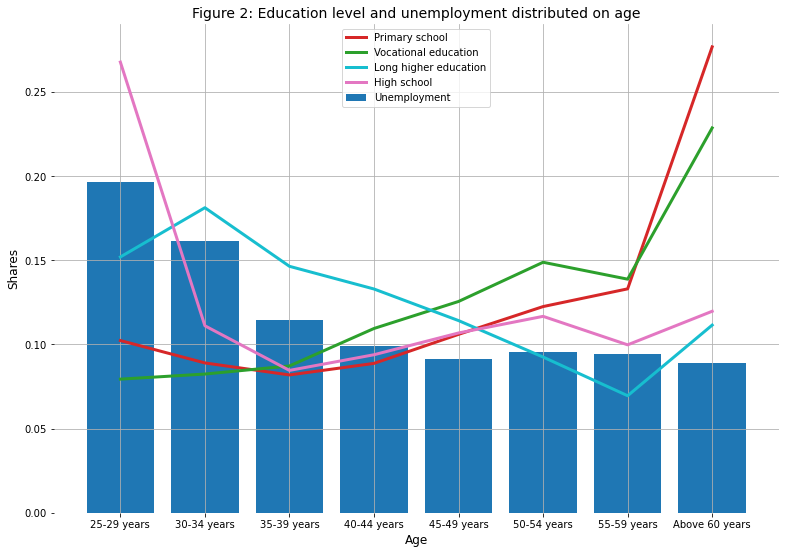

In [15]:
# Generating a list of age categories to the x axis
age_list = ['25-29 years', '30-34 years', '35-39 years', '40-44 years', '45-49 years', '50-54 years', '55-59 years', 'Above 60 years']

# Deleting the total for each education level and unemployment level
del col_1[8]
del col_2[8]
del col_3[8]
del col_7[8]
del col[0]

# Generating the figure based on the lists of shares of each education level and share of unemployment distributed on age groups
fig = plt.figure(figsize = (13,9)) # define new figure object
ax = fig.add_subplot(111) # add subplot
ax.plot(age_list , col_1, lw = 3, color = 'C3', label = 'Primary school')
ax.plot(age_list, col_3, lw = 3, color = 'C2', label = 'Vocational education')
ax.plot(age_list, col_7, lw = 3, color = 'C9', label = 'Long higher education')
ax.plot(age_list, col_2, lw = 3, color = 'C6', label = 'High school')
plt.bar(age_list, col, lw = 1, color = 'C0', label = 'Unemployment')

ax.grid(True)
   
ax.set_xlabel('Age', fontsize = 12)
ax.set_ylabel('Shares', fontsize = 12)
ax.legend(loc = 'best')
ax.set_title('Figure 2: Education level and unemployment distributed on age', fontsize = 14)
  
# Remove borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

The figure above shows a close connection between the shares of primary school educated and vocational educated. The share of long higher educated are highest in the bottom of the age distribution which is also the groups that has the highest unemployment share, which is surprising. However, that can be explained by the fact, that this group also has the highest share of high school educated, and people with a lower degree of education might experience more challenges finding a job.

The two figures above shows, that the oldest group has the lowest share of unemployment. This might be due to the fact that the share of unemployment is computed using the total work force, which is people that are able to work in the working age (15-64 years). When the older workers leave their jobs, they might choose to retire, meaning that they are not seen as unemployed.\
Meanwhile, the younger groups have the highest shares of unemployment, which can be caused by graduates being unemployed while seaching for their first full-time job.\
Another fact to take into account is that we have used full-time unemployment. This means that the person must be unemployed for an entire year, in order to count as a full-time unemployed. Therefore, it might be possible that the older groups are more often unemployed, but are however unemployed for a shorter period of time compared to the younger groups. This can be explained by older groups having larger responsibility and thus incentive to take a new job faster.

The share of people having a long higher education is largest for the younger groups, while the share of people having primary school or vocational education as their highest completed education is largest for the older groups. The reason for this might be that there has been a switch in the type of education needed for the supply of jobs today compared to earlier.

# Conclusion

This assignment provides a description and analysis of the connection between unemployment and education levels. We find that the unemployment share is decreasing with age, which can be explained by the fact that older workers retire when they get unemployed, while young people often are unemployed after graduating.\
The shares of high school educated and bachelor degrees are highest among the youngest age groups whereas the shares of primary school and vocational educated are highest among the older workers. This can be caused by a tendency to take a higher education in younger generations because the largest part of the jobs are located in the tertiary sector compared to earlier, where there were more jobs in the primary sector. This tendency arises from the job market being more automated which decreases the demand for unskilled labor.